# Initial Setup

## Imports

In [1]:
# Set random seed
import numpy as np
np.random.seed(42)

# Plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Database
from JobsDb import JobsDb

# Verification
from sklearn.model_selection import train_test_split

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Dimension Reduction
from sklearn.decomposition import TruncatedSVD

# Clustering
from sklearn.cluster import KMeans

# Pipeline
from sklearn.pipeline import Pipeline

# Clustering Evaluation
from sklearn.metrics import calinski_harabasz_score

## Loading the Data

In [2]:
db = JobsDb()
df = db.load_table_as_df('jobs')
db.close()
df = df.iloc[9680:]
print(df.shape)
df.head()

(9485, 4)


,id,title,url,description
9680,9681,Railcar Verifier/Transload Team Member/Data Entry,https://www.careerjet.com/jobad/us5194732b36a6...,\nCompany Overview Come join a Winning Team! ...
9681,9682,Data Entry Clerk,https://www.careerjet.com/jobad/us83f88fb60b47...,"\n prepare, compile and sort documents for dat..."
9682,9683,Data Scientist,https://www.careerjet.com/jobad/us466d6146a815...,\n \n Data Scientist is responsible for co...
9683,9684,Provider Data Specialist,https://www.careerjet.com/jobad/uscb5cda0893f6...,\n \n Title: Provider Data Specialist Loc...
9684,9685,Security Data Architect,https://www.careerjet.com/jobad/us00dc3c284dbd...,"\nOur Mission At Dobbs Defense, we deliver mi..."


## Extracting Job Descriptions

In [3]:
descriptions = df['description']

## Making Test Train Split

In [5]:
train = descriptions

# Model Architecture 

## Clustering Hyper-Parameter Selection
Re-factor with clustering pipe -> KMeans 

In [46]:
outcomes = {
    'n_components': [],
    'n_clusters': [],
    'CH_score': [],
    'WCSS_score': []
}

vec = TfidfVectorizer(stop_words='english', max_features=2000, ngram_range = (1,3))
train_vec = vec.fit_transform(train)

for n_components in range(2, 5):
    for n_clusters in range(2, 11):
        dimr = TruncatedSVD(n_components = n_components, random_state=42)
        train_t = dimr.fit_transform(train_vec)
        clusterer = KMeans(n_clusters=n_clusters)
        target_train = clusterer.fit_predict(train_t)
        outcomes['CH_score'].append(calinski_harabasz_score(train_t, target_train))
        outcomes['WCSS_score'].append(clusterer.inertia_)
        outcomes['n_components'].append(n_components)
        outcomes['n_clusters'].append(n_clusters)
        print(f'Finished evaluating for {n_components} components and {n_clusters} clusters.')

Finished evaluating for 2 components and 2 clusters.
Finished evaluating for 2 components and 3 clusters.
Finished evaluating for 2 components and 4 clusters.
Finished evaluating for 2 components and 5 clusters.
Finished evaluating for 2 components and 6 clusters.
Finished evaluating for 2 components and 7 clusters.
Finished evaluating for 2 components and 8 clusters.
Finished evaluating for 2 components and 9 clusters.
Finished evaluating for 2 components and 10 clusters.
Finished evaluating for 3 components and 2 clusters.
Finished evaluating for 3 components and 3 clusters.
Finished evaluating for 3 components and 4 clusters.
Finished evaluating for 3 components and 5 clusters.
Finished evaluating for 3 components and 6 clusters.
Finished evaluating for 3 components and 7 clusters.
Finished evaluating for 3 components and 8 clusters.
Finished evaluating for 3 components and 9 clusters.
Finished evaluating for 3 components and 10 clusters.
Finished evaluating for 4 components and 2 c

<AxesSubplot:>

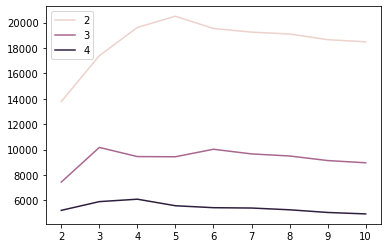

In [47]:
sns.lineplot(x=outcomes['n_clusters'], y=outcomes['CH_score'], hue=outcomes['n_components'])

<AxesSubplot:>

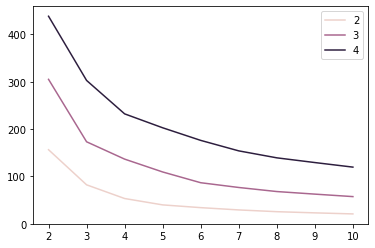

In [48]:
sns.lineplot(x=outcomes['n_clusters'], y=outcomes['WCSS_score'], hue=outcomes['n_components'])

In [49]:
n_components = 2
n_clusters = 5
dimr = TruncatedSVD(n_components = n_components, random_state=42)
train_t = dimr.fit_transform(train_vec)
clusterer = KMeans(n_clusters=n_clusters)
target_train = clusterer.fit_predict(train_t)

<AxesSubplot:>

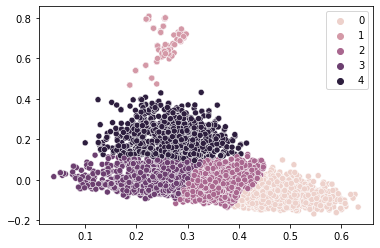

In [50]:
sns.scatterplot(x=train_t[:,0], y=train_t[:,1], hue=target_train)

## Define Clustering Pipeline

In [35]:
clustering_pipe = Pipeline(
    steps = [
        ('vectorization', TfidfVectorizer(stop_words='english', max_features=2000, ngram_range = (1,3))),
        ('dimensionReduction', TruncatedSVD(n_components = 2, random_state=42)),
        ('clustering', KMeans(n_clusters = 5))
    ]
)

## Fit Final Clustering Pipeline

In [51]:
clustering_pipe.fit(train)

Pipeline(steps=[('vectorization',
                 TfidfVectorizer(max_features=2000, ngram_range=(1, 3),
                                 stop_words='english')),
                ('dimensionReduction', TruncatedSVD(random_state=42)),
                ('clustering', KMeans(n_clusters=5))])

In [52]:
clustering_pipe.get_params()['dimensionReduction'].components_

array([[ 0.00862409,  0.0170129 ,  0.02035154, ...,  0.01034332,
         0.00590545,  0.00849763],
       [ 0.02150875,  0.01034469,  0.00260022, ..., -0.00238571,
         0.00114967, -0.00258995]])

In [53]:
clustering_pipe.get_params()['vectorization'].vocabulary_

{'overview': 1289,
 'come': 316,
 'join': 1008,
 'team': 1806,
 'leading': 1042,
 'warehousing': 1939,
 'needs': 1210,
 'industry': 952,
 'strategic': 1756,
 'locations': 1081,
 'modern': 1183,
 'systems': 1795,
 'dedicated': 496,
 'employees': 643,
 'allow': 84,
 'provide': 1448,
 'custom': 419,
 'solutions': 1698,
 'challenging': 263,
 'customers': 424,
 '15': 6,
 'warehouse': 1937,
 'sites': 1676,
 'handle': 872,
 'non': 1225,
 'include': 936,
 'building': 218,
 'materials': 1128,
 '200': 9,
 'performing': 1322,
 'distribution': 593,
 'business': 223,
 'headquartered': 879,
 'city': 277,
 'ca': 233,
 'goal': 849,
 'expectations': 726,
 'attitude': 159,
 'position': 1358,
 'type': 1867,
 'expected': 727,
 'hours': 905,
 'work': 1957,
 'time': 1835,
 'able': 25,
 'long': 1083,
 'holidays': 900,
 'needed': 1209,
 'qualifications': 1460,
 'years': 1990,
 'read': 1486,
 'write': 1980,
 'english': 671,
 'basic': 188,
 'computer': 348,
 'skills': 1680,
 'successfully': 1784,
 'pass': 1307,

In [54]:
clustering_pipe.get_params()['vectorization'].stop_words_

{'modernization services conduct',
 'multiple processes unified',
 'analysis definition architecture',
 'use consultation partner',
 'includes projects',
 'minimum years release',
 'vbscript python',
 'management framework including',
 'patients people deserve',
 'professional years experience',
 'engagement units complement',
 'lines manage',
 'requirements experience managing',
 'marketplaces powering business',
 'patient life second',
 'interns date industry',
 'powerbi data integration',
 'contract temporary direct',
 'fidelity providing',
 'actionable insights knowledge',
 'workflow tools data',
 'time engagement planning',
 'depth cybersecurity analysis',
 'track positions',
 'team network database',
 'apply appropriate statistical',
 'obtain ba bs',
 '20 accolades',
 'documentation troubleshoots complex',
 'ml applications ivyexec',
 'research support client',
 'record broken',
 'team supervision competitive',
 'level opportunity work',
 'need design deliver',
 'handling experie